# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('IAT_DATA.csv')

In [3]:
df.drop(columns = 'Unnamed: 0')

,birthyear,birthSex,race,ethnicity,highest education,iat score,arts,science,la association,sci association,...,sci importance,math importance,countrycit_num,countryres_num,occuSelf,politicalid,STATE,MSANo,CountyNo,MSAName
0,1985.0,2.0,8.0,1.0,7.0,0.371520,5.0,4.0,4.0,5.0,...,3.0,4.0,1.0,1.0,Social Service,5.0,WA,42660.0,61.0,"Seattle-Tacoma-Bellevue, WA MSA"
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110720,NaN,NaN,NaN,NaN,NaN,0.213731,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110721,1997.0,2.0,6.0,2.0,8.0,0.236654,5.0,5.0,4.0,4.0,...,5.0,5.0,1.0,1.0,Unemployed/Retired,7.0,OR,38900.0,51.0,"Portland-Vancouver-Beaverton, OR-WA MSA"
110722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head()

,Unnamed: 0,birthyear,birthSex,race,ethnicity,highest education,iat score,arts,science,la association,...,sci importance,math importance,countrycit_num,countryres_num,occuSelf,politicalid,STATE,MSANo,CountyNo,MSAName
0,0,1985.0,2.0,8.0,1.0,7.0,0.37152,5.0,4.0,4.0,...,3.0,4.0,1.0,1.0,Social Service,5.0,WA,42660.0,61.0,"Seattle-Tacoma-Bellevue, WA MSA"
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

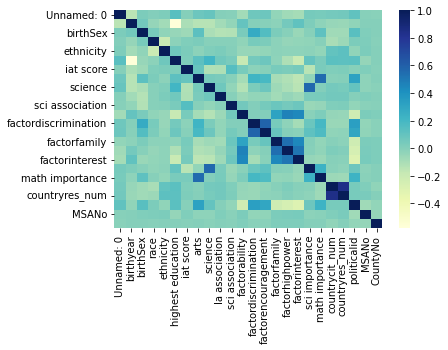

In [5]:
sns.heatmap(df.corr(), cmap = 'YlGnBu')
plt.show()

In [6]:
corr = df.corr().abs()

unstacked = corr.unstack()

sort = unstacked.sort_values(kind="quicksort", ascending=False)

In [7]:
#SAME VARIABLE PAIRS
sort[:24]

Unnamed: 0            Unnamed: 0              1.0
factordiscrimination  factordiscrimination    1.0
race                  race                    1.0
ethnicity             ethnicity               1.0
highest education     highest education       1.0
iat score             iat score               1.0
arts                  arts                    1.0
science               science                 1.0
la association        la association          1.0
sci association       sci association         1.0
factorability         factorability           1.0
factorencouragement   factorencouragement     1.0
birthyear             birthyear               1.0
factorfamily          factorfamily            1.0
factorhighpower       factorhighpower         1.0
factorinterest        factorinterest          1.0
sci importance        sci importance          1.0
math importance       math importance         1.0
countrycit_num        countrycit_num          1.0
countryres_num        countryres_num          1.0


In [8]:
#DIFFERENT VARIABLE PAIRS -- OVERALL WEAK CORRELATION
sort[24:34]

countryres_num        countrycit_num          0.845736
countrycit_num        countryres_num          0.845736
factordiscrimination  factorencouragement     0.584864
factorencouragement   factordiscrimination    0.584864
birthyear             highest education       0.575869
highest education     birthyear               0.575869
science               sci importance          0.565023
sci importance        science                 0.565023
arts                  math importance         0.551806
math importance       arts                    0.551806
dtype: float64

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

The columns with the strongest correlation is countryres_num and countrycit_num, however, I don't think these variables would be appropriate to use to make a model because they are not independent of each other. The next best option is factor discrimination and factor encouragement, which is weakly correlated but I'm going to use them anyways.

In [9]:
x = df['factordiscrimination']
y = df['factorencouragement']

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.7,
                                                   test_size = 0.3,
                                                   random_state = 100)

In [13]:
x_train = x_train.dropna()
y_train = y_train.dropna()

In [14]:
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)

lr = sm.OLS(y_train, x_train_sm).fit()

In [16]:
lr.params

const                   1.638624
factordiscrimination    0.574445
dtype: float64

In [17]:
#As predicted, this model is not good because the two variables aren't strongly correlated.
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     factorencouragement   R-squared:                       0.345
Model:                             OLS   Adj. R-squared:                  0.345
Method:                  Least Squares   F-statistic:                 2.383e+04
Date:                 Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                         21:04:34   Log-Likelihood:                -64251.
No. Observations:                45179   AIC:                         1.285e+05
Df Residuals:                    45177   BIC:                         1.285e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.6386      0.015    108.759      0.000       1.609       1.668
factordiscrimination     0.5744      0.004    154.381      0.000       0.567       0.582
==============================================================================
Omnibus:                     4384.105   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6957.913
Skew:                          -0.719   Prob(JB):                         0.00
Kurtosis:                       4.275   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Error Terms

Finally, plot your error terms!

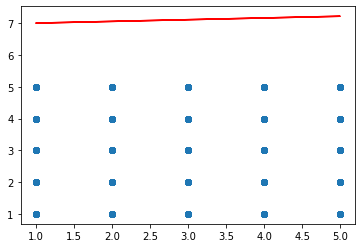

In [18]:
#Yikes
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.345
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was not particularly effective in this case because the two variables were weakly correlated.
3. Was your plot of the error terms a bell curve? Not at all.